# IE 5137 Computational Modelling in Industrial Engineering 

## Assignment 5

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from operator import add
from scipy.optimize import curve_fit
from scipy.optimize import bisect
from scipy.integrate import odeint
from scipy.integrate import quad

### Question 1 (10 points)

Plot the function
$$y=\frac{cos⁡(x)}{x^2+5}$$

for $-15≤x≤15$ as a continuous line. Include enough points so that the curve you plotted appears smooth. Label the axes $X$ and $Y$.


In [12]:
def function(x):
    y=[]
    for i in x:
        y.append(math.cos(i)/((i**2)+5))
    return y

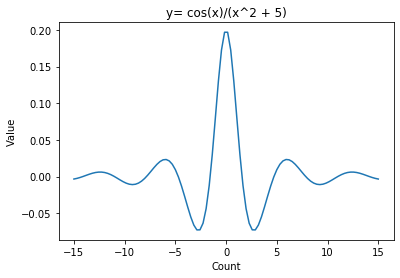

In [13]:
x=np.linspace(-15,15,100)
data = function(x)

plt.Figure(figsize=(30,20))
plt.plot(x,data)
plt.xlabel('Count')
plt.ylabel('Value')
plt.title('y= cos(x)/(x^2 + 5)')
plt.show()

### Question 2 (10 points)

Plot the functions $$sin⁡(x^2) \;and\; cos⁡(√x)$$ on the same plot for $-10≤x≤10$.

Make sure the limits of X-axis do not extend beyond the limits of the data.

Plot the sine curve as a dashed green line and the cosine curve as a black dotted line.\
Include a legend to label the two curves

place the legend within the plot, but such that it does not cover either of the sine or cosine traces.

In [5]:
def function2(x):
    y=[]
    z=[]
    for i in x:
        y.append((math.sin(i**2)))
        z.append(math.cos(i))
    return y,z

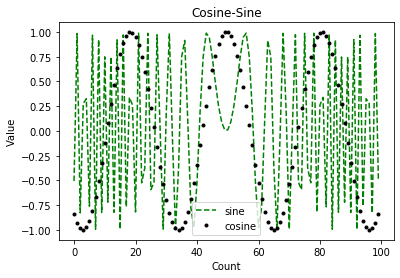

In [6]:
x = np.linspace(-10,10,100)
data1, data2 =function2(x)


plt.plot(data1,'g--',label='sine')
plt.plot(data2,'.',color='black',label='cosine')
plt.xlabel('Count')
plt.ylabel('Value')
plt.title('Cosine-Sine')
plt.legend(loc='lower center')

### Question 3 (15 points)

Plot distance ($y$) versus time ($t$) with error bars using the following data:
<pre><code><strong>
   t = [1.0, 4.5, 8, 11.5, 15, 18.5, 22, 25.5, 29, 32.5, 36.0, 39.5, 43]
   y = [2.94, 8.3, 9.36, 11.6, 9.3, 7.75, 8.06, 5.6, 4.5, 4, 2.62, 1.7, 2]
   dy = [0.7, 1.2, 1.2, 1.4, 1.3, 1.1, 1.2, 1, 0.8, 0.8, 0.7, 0.6, 0.6]
</pre></code></strong>
Use circles for the data points, and the $dy$ variable for the corresponding error estimates.\
Label the horizontal and vertical axes **time (s)** and **position (cm)**. On the same graph, plot the function

$$\left(3+\frac{1}{2} sin\left(\frac{πt}{5}\right)\right) t e^\left(-\frac{t}{10}\right)$$  
as a smooth line. Make this line pass behind the data points.


<ErrorbarContainer object of 3 artists>

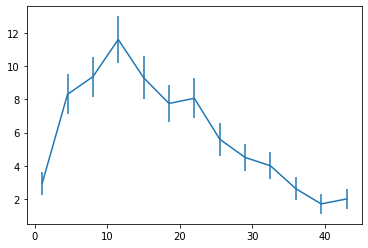

In [15]:


t = [1.0, 4.5, 8, 11.5, 15, 18.5, 22, 25.5, 29, 32.5, 36.0, 39.5, 43]
y = [2.94, 8.3, 9.36, 11.6, 9.3, 7.75, 8.06, 5.6, 4.5, 4, 2.62, 1.7, 2]
dy = [0.7, 1.2, 1.2, 1.4, 1.3, 1.1, 1.2, 1, 0.8, 0.8, 0.7, 0.6, 0.6]

def function3(t):
    x=[]
    for i in t:
        x.append((3 + ((1/2)*math.sin((math.pi*i)/5))) * i * math.exp(-i/10))
    return x

est = list(map(add,y,dy))

data3 = function3(t)    
#plt.plot(t,y,'o')
plt.errorbar(t,y,dy)
#plt.plot(t,data3,alpha=0.2)


### Question 4 (15 points)

In exercise 7 from assignment 4, you loaded the latest US COVID daily report as a Pandas data frame and performed some data processing and analysis tasks.

Using the same data set, construct a scatter plot of COVID mortality rates against COVID incidence rates across US states.

Set the size of the data points proportional to the numbers of deaths, and their color to testing rates _(see https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html for a list of colormaps)._

Use transparency and size data scaling as needed to minimize the overlap of plotted points.\
Add a color bar, and horizontal and vertical gridlines to your plot, then label all axes appropriately _(use the label argument to add a title to the color bar)._


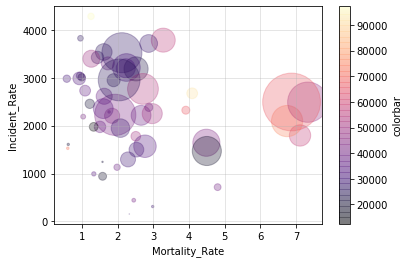

In [8]:
data4 = pd.read_csv("D:\Semester_3\Computational Modeling\Assignments\Assignment_4\covid_data.csv")
data4.head()

plt.scatter(data4['Mortality_Rate'],data4['Incident_Rate'],c=data4['Testing_Rate'],s=data4['Deaths']*0.1,alpha=0.3,cmap=plt.get_cmap('magma'))
plt.xlabel('Mortality_Rate')
plt.ylabel('Incident_Rate')
plt.grid(alpha=0.4)
plt.colorbar(cmap=plt.get_cmap('magma'),label='colorbar')


### Question 5 (15 points)

The array
<pre><code><strong>
   d = np.array([444, 761, 3554, 5806, 13522, 22112, 29631, 33366, 56249,
       61682, 62662, 64287, 65596, 66907, 67332, 67666, 67760, 67786])
</pre></code></strong>       
contains the total numbers of confirmed COVID infections in Hubei, China between 2020-Jan-22 and 2020-Mar-13 in 3-day steps. Use the `curve_fit` function in SciPy to fit a logistic growth curve,

$$y(t)=\frac{a}{1 + e^\left(-b(t-c)\right)}$$

to these data, where $a>0$ is the maximum number of cases (reached asymptotically as $t→∞$), $b>0$ is the growth rate, and $c$ is the inflection point (the day with the largest increase).

Experiment with different initial guesses for the parameters to ensure the algorithm converges.

Plot the optimal fit against the empirical data for visual validation. Does the estimated inflection point agree with the data? How does the estimated asymptote compare to the most recent count (68139)?


[6.79413274e+04 2.26059920e-01 1.90291383e+01]


C:\Users\sdeva\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


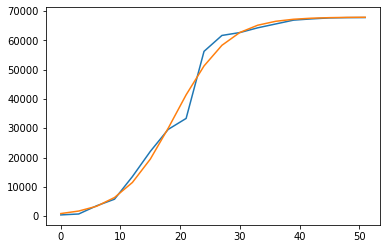

In [17]:
y = np.array([444, 761, 3554, 5806, 13522, 22112, 29631, 33366, 56249,
       61682, 62662, 64287, 65596, 66907, 67332, 67666, 67760, 67786])

def function5(t,a,b,c):
    return(a/(1 + np.exp(((-b)*(t-c)))))

l = len(y)*3
#print(l)
t = np.arange(0,l,3)
#t = np.arange(18)
#print(t)
val,cov = curve_fit(function5,t,y,p0=(500,0,10))
print(val)
#print(cov)

plt.plot(t,y)
plt.plot(t,function5(t,val[0],val[1],val[2]))

### Question 6 (15 points)

In exercise 10 from assignment 2, you implemented the bisection algorithm to find an approximate root of the function

$$f(x)=x^3-6x^2+4x+12$$

between $x_0=3$ and $x_1=6$. Use the SciPy bisect function to find this same root. Compare the results computed by SciPy and your program from the earlier exercise. Also compare their runtimes (using `%time` or `%timeit`).

In [12]:
def function6(x):
    
    return((x**3) - (6*(x**2)) + (4*x) + 12)
    

print(bisect(function6,3,6))    
%time bisect(function6,3,6)



4.534070196722951
Wall time: 0 ns


4.534070196722951

In [16]:
%%time 

#define function for polynomial 
def funx(x):
    f = x**3 - 6*x**2 + 4*x + 12
    return f

Wall time: 0 ns


In [15]:
%%time
x0 = 3
x1 = 6

 
for i in range(15):
    x_mid = (x0+x1)/2
    if (funx(x0)*funx(x_mid)) < 0:
        x1 = x_mid
    else: 
        x0 = x_mid
    print(x_mid)

4.5
5.25
4.875
4.6875
4.59375
4.546875
4.5234375
4.53515625
4.529296875
4.5322265625
4.53369140625
4.534423828125
4.5340576171875
4.53424072265625
4.534149169921875
Wall time: 970 µs


### Question 7 (10 points)

Write a program that computes the solution $y(t)$ of the ODE

$$\frac{dy}{dt}= - e^\left(-t \right) (10 sin⁡(10t)+cos⁡(10t))$$

using the `odeint` function from $t_0=0$ to $t_1=10$. The initial value is $y(0)=1$. Display the solution graphically over the  $[t_0,t_1]$ interval in steps of 0.01.


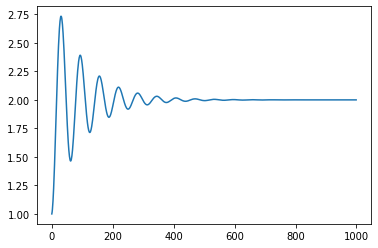

In [8]:
def function7(d,t):
    dy = (math.exp(-t)) * ((10* math.sin(10*t)) + math.cos(10*t))
    return dy

y0 = 1
g = np.arange(0,10,0.01)
array = odeint(function7,y0,g)

plt.plot(array)

### Question 8 (10 points)

Write a program that numerically solves the integral

$$I=∫_0^1(cos⁡(2πx)) dx$$

using SciPy’s `quad` function. Find the analytical integral and compare it with your solution. Why is it important to have an estimate of the accuracy (or the error) of the numerical integral?


In [14]:
def function8(x):
    i = math.cos(2*math.pi*x)
    return i

value = quad(function8,0,1)
print(value)

(4.163336342344337e-17, 7.116990625963435e-15)
